## Assignement 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pystan
import random

# Task A 
## 1.
### a)

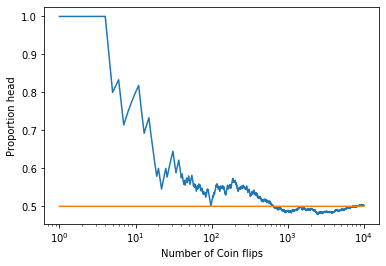

In [2]:
tosses=10000
L=np.zeros(tosses)
for e in range(tosses):
    sample=random.random()
    if sample>0.5:
        L[e]=1
y=np.cumsum(L)/(np.arange(1,10001))
x=np.arange(1,10001)
plt.semilogx()
plt.plot(x,y,'-')
plt.plot(x,np.full((len(x),1),0.5),'-')
plt.xlabel('Number of Coin flips')
plt.ylabel('Proportion head')
plt.show()
#plt.savefig('H:\Documents\Kurser\Baysian\coinflip.png', bbox_inches='tight')


### b)

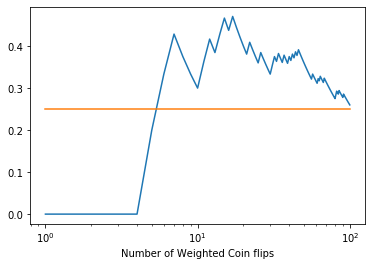

In [3]:
tosses=100
L=np.zeros(tosses)
for e in range(tosses):
    sample=random.random()
    if sample>0.75:
        L[e]=1
        
y=np.cumsum(L)/(np.arange(1,tosses+1))
x=np.arange(1,tosses+1)
plt.semilogx()
plt.plot(x,y)
plt.plot(x,np.full((len(x),1),0.25),'-')
plt.xlabel('Number of Weighted Coin flips')
plt.show()

### c)

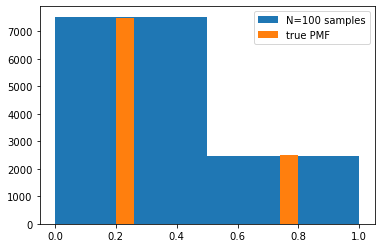

In [4]:
tosses=10000
L=np.zeros(tosses)
for e in range(tosses):
    sample=random.random()
    if sample>0.75:
        L[e]=1
z=int(0.75*tosses)
o=int(0.25*tosses)

PMF=np.concatenate((np.zeros(z)+.2,np.ones(o)-.2))
plt.hist(L,(0,0.5,1))
plt.hist(PMF)
plt.legend(('N=100 samples','true PMF'))
plt.show()

#### i. 
As n grows the sampled probability mass function will aproach the true probability mass function.
#### ii.
At around 1000 tosses the difference is so small so it is rarely dicenable in graph form.


## 2

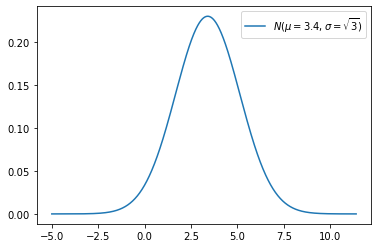

In [5]:
#PDF for a normal distribution.
def PDFnormal(x,mu,sigma):
    y=1/np.sqrt(2*np.pi*sigma**2)*np.exp(-.5*(x-mu)**2/sigma**2)
    return y
x=np.linspace(-5,11.4,1000)
plt.plot(x,PDFnormal(x,3.4,np.sqrt(3)))
plt.legend([r'$N (\mu = 3.4,\sigma = \sqrt{3}$)'])
plt.show()

### a)
Since the CDF of this function is continuously increasing an easy way to sample from this distribution is by using [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling).

The invers CDF of the normal distribution exists in the scipy.stats package as norm.ppf.
The function input values are a sampled U(0,1) value, location ($\mu$) and scale ($\sigma$). 

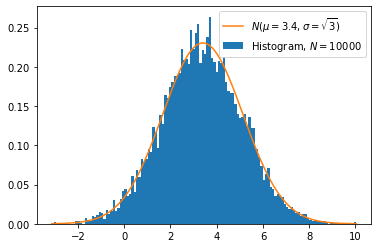

In [6]:
#Given values
mu=3.4
Var=3
sigma=np.sqrt(Var)

NumbVal=10000  #Number of values to be sampled
U=np.zeros(NumbVal) #array for U(0,1) sampling
N=np.zeros(NumbVal)
for e in range(NumbVal):
    U[e]=random.random() #fill the array with sampled numbers
    N[e]=scipy.stats.norm.ppf(U[e], loc=mu, scale=sigma) #inverse transform sampling

binsize=np.linspace(min(N),max(N),int(((max(N)-min(N))/.1)))
hist=plt.hist(N,binsize,density=True)
xplot=np.linspace(min(N),max(N),1000)
plt.plot(xplot,PDFnormal(xplot,mu,sigma)) #Plot calling the PDF function

plt.legend([r'$N (\mu = 3.4,\sigma = \sqrt{3}$)','Histogram, $N=10000$'])

plt.show()

The sampling and the distribution do match confirming that the inverse transform sampling has worked.

## b)
The Expected value is defined as $$E(X) = \int x *p(x)dx$$
where $p(x)$ is the PDF of the random variable X.

This integral can be evaluated using the Riemann sum which is defined as $$\sum_{i=0}^{n-1}f(x)\Delta x$$

In [7]:
xarray=np.linspace(min(x),max(x),1000) #Array of x values on the range of the PDF
yarray=PDFnormal(xarray,mu,sigma) #Corresponding PDF values from normal distribution
S=np.zeros(len(xarray)) #pre-allocation
for i in range(len(xarray)-1):
    S[i]=(xarray[i]*yarray[i])*(xarray[i+1]-xarray[i]) #Defining the area of each bar in the riemann sum


RieSumMean=np.sum(S) 
print('Riemann Sum =',RieSumMean)

Riemann Sum = 3.3999800487202765


We can now compare the mean values from the sampling, the numerical integration (Riemann sum) and the true mean (3.4)

In [8]:
print('Evaluation of the distribution mean (Expected value)')
print('True mean:',mu)
print('From the definition of expected value evaluated using the Riemann sum:',RieSumMean)
print('From 10000 samples collected:',np.mean(N))

Evaluation of the distribution mean (Expected value)
True mean: 3.4
From the definition of expected value evaluated using the Riemann sum: 3.3999800487202765
From 10000 samples collected: 3.372595212066708


They do seem to match quite well indicating that the code works

## c)
We now use the snippets of code for calculating the riemann sum but rewrite it to instead evaluate the variance defined in the book as
$$ var_x=\int p(x) (x-E[x])^2 dx$$

In [9]:
S2=np.zeros(len(xarray)) #pre-allocation for Riemann sum
for i in range(len(xarray)-1):
    S2[i]=yarray[i]*(xarray[i]-mu)**2*(xarray[i+1]-xarray[i]) #Defining the area of each bar in the riemann sum

RieSumVar=np.sum(S2) 

We can now do the same as before and compare the variance values from the sampling, the numerical integration (Riemann sum) and the true Variance (3)

In [10]:
print('Evaluation of the distribution variance')
print('True Variance:',Var)
print('From the definition of variance evaluated using the Riemann sum:',RieSumVar)
print('From 10000 samples collected:',np.var(N))

Evaluation of the distribution variance
True Variance: 3
From the definition of variance evaluated using the Riemann sum: 2.999816364994416
From 10000 samples collected: 3.0444440589191357


This also seems to be working properly. Running the code a few times it is clear that the Riemann sum evaluation fluctuates less than the evaluation from the 10000 samples. 

## d)

Let $x$ denote a vector with normally distributed values with $\mu=0$ and $\sigma=1$.
### i.
To get x we do inverse transform sampling like before

In [11]:
mud=0; sigmad=1 #mu and sigma for excercise d
NumbVal=10000  #Number of values to be sampled
Ud=np.zeros(NumbVal) #array for U(0,1) sampling
xd=np.zeros(NumbVal)
for e in range(NumbVal):
    Ud[e]=random.random() #fill the array with sampled numbers
    xd[e]=scipy.stats.norm.ppf(U[e], loc=mud, scale=sigmad) #inverse transform sampling
    
yd=np.exp(xd) #Creates a log-normally distributed y

### ii.

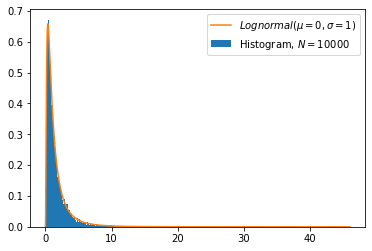

In [12]:
##function defining the log-normal PDF
def PDFlognorm(x,mu,sigma): #mu and sigma are not the location and scale parameters of the acctual Log-Normal distribution but rather of its normally distributed logarithm.
    y=1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-.5*(np.log(x)-mu)**2/sigma**2)
    return y  

binsize=np.arange(0,max(yd),0.1)
hist=plt.hist(yd,binsize,density=True) 
xplot=np.linspace(0.0001,max(yd),10000)
z=PDFlognorm(xplot,mud,sigmad) 
PDFplot=plt.plot(xplot,z) #Plot calling the PDF function
plt.legend([r'$Lognormal(\mu = 0,\sigma = 1$)','Histogram, $N=10000$'])
plt.show()

This does look correct but for a closer look let's zoom in 

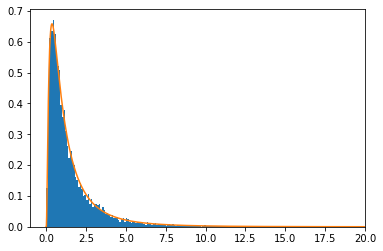

In [13]:
binsize=np.arange(0,max(yd),0.1)
hist=plt.hist(yd,binsize,density=True)
xplot=np.linspace(0.0001,max(yd),10000)
PDFplot=plt.plot(xplot,z) #Plot calling the PDF function
plt.xlim(-1,20)
plt.show()

and it does indeed seem to work.
### iii.
1) see above

2) the index of the maximum value in the z array can be found using np.argmax(z), an estimated mode is can then be calculated as xplot[np.argmax(z)]

In [14]:
mode=xplot[np.argmax(z)]
print('estimated mode:',mode)

estimated mode: 0.36794176193086126


### iv.
Now we use an optimization tool.

In [15]:
from scipy.optimize import fmin

In [16]:
def NegativePDFlognorm(x,mu,sigma): #mu and sigma are not the location and scal parameters of the Log-Normal distribution but rather of its normally distributed logarithm.
    y=-1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-.5*(np.log(x)-mu)**2/sigma**2)
    return y
MinX=fmin(NegativePDFlognorm,1,(mud,sigmad)) #minimized value using fmin
print('Evaluated mode:',MinX[0])

C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Optimization terminated successfully.
         Current function value: -0.657745
         Iterations: 16
         Function evaluations: 32
Evaluated mode: 0.3678710937499995


C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:571: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[0]:
C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:582: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-2]:
C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:587: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-1]:


The mode estimated from the fmin function is close but not exactly the same as the extimate from the maximum function value. 

# Task B
## 1.
Making a function that takes a specific path and file name as input and creates a structure containing data from the file.

In [17]:
def MatrixMakerCVS(path,filename):
    Read=open(path+filename,'r')
    Lines=Read.readlines()
    Dim=int(np.sqrt(len(Lines)-1))
    mat=np.zeros((Dim,Dim))
    i=0
    j=0
    start=False
    
    for line in Lines:
        if start==True:
            hair=line.split(',')[0] #Splits the lines into "columns". In this case only "value" is used but this could be useful for other data formats.
            eyes=line.split(',')[1]
            value=line.split(',')[2]
            mat[i,j]=int(value)
            if ((i+1)%Dim)==0:
                j+=1
                i=0
            else:
                i=i+1
        start=True
    return(mat)
    print(mat)


In [18]:
path='C:\\Users\\viksan\\Bayesian Data analysis'
file='\HairEyeColor.csv'
MatrixMakerCVS(path,file)

array([[ 20.,  94.,  84.,  17.],
       [ 68.,   7., 119.,  26.],
       [  5.,  16.,  29.,  14.],
       [ 15.,  10.,  54.,  14.]])

## 2.

In [19]:
Matrix=MatrixMakerCVS(path,file)
print('a) sum over columns')
SumEye=np.sum(Matrix,0)
print(SumEye)
print('b) sum over rows')
SumHair=np.sum(Matrix,1)
print(SumHair)
print('c) sum over all elements')
SumTot=np.sum(Matrix)
print(SumTot)

a) sum over columns
[108. 127. 286.  71.]
b) sum over rows
[215. 220.  64.  93.]
c) sum over all elements
592.0


## 3.
### a.

In [20]:
P_Blue_Blond=Matrix[0,1]/SumTot
print('P(Blue,Blond)=',P_Blue_Blond)

P(Blue,Blond)= 0.15878378378378377


### b.

In [21]:
P_Brown=SumEye[1]/SumTot
print('P(Brown Eyes)=',P_Brown)

P(Brown Eyes)= 0.21452702702702703


### c.

In [22]:
P_red_given_brown=Matrix[1,3]/SumEye[1]
print('P(Red|Brown)=',P_red_given_brown)

P(Red|Brown)= 0.2047244094488189


### d.

In [23]:
Pd=(Matrix[0,1]+Matrix[0,3]+Matrix[1,1]+Matrix[1,3])/SumTot
print('P((Red U Brown)_Intersection_(Brown U Blue))=',Pd)

P((Red U Brown)_Intersection_(Brown U Blue))= 0.24324324324324326


### e.

In [24]:
Pe=(SumHair[1]+SumHair[2]+SumEye[0]+SumEye[1]-Pd*SumTot)/SumTot
print('P((Red U Brown) U (Brown U Blue))=',Pe)

P((Red U Brown) U (Brown U Blue))= 0.6334459459459459


### f.

To show dependence the easies way should be to disprove independence. Independence is defined as $P(x|y)=P(x)$ for all values of x and y.
From c. we know $P(Red|Brown)=0.2047244094488189$ i.e probability of red hair given brown eyes. For independence this should equal $P(Red)$ i.e the probability of red hair.

In [25]:
P_red=SumHair[3]/SumTot
print('P(Red)=',P_red,'/=',P_red_given_brown)

P(Red)= 0.1570945945945946 /= 0.2047244094488189


This is enough to prove that the attributes are not independent.